### This jupyter notebook has 3 functions:
    1) Authprization with Google
    2) Image/file download
    3) Show image

### Imports:

In [1]:
# Imports:
from apiclient import discovery
from httplib2 import Http
import oauth2client
from oauth2client import file, client, tools
import io
from googleapiclient.http import MediaIoBaseDownload
import skimage
import skimage.io as sio
import matplotlib.pyplot as plt

### Google Authorization

I used this [tutorial](https://medium.com/@umdfirecoml/a-step-by-step-guide-on-how-to-download-your-google-drive-data-to-your-jupyter-notebook-using-the-52f4ce63c66c) for reference 

* The function below accesses Google Drive to verify your credentials.
* Once you run it, you should get a link, open this link in a web browser and load your Google credentials as requested.
* Once ok, you will get a verification code, copy it and insert it in a window in this jupyter notebook.

This file below `client_id.json` has to be saved in the same folder as this Jupyter Notebook, otherwise looks like Authorization won't work. \
I will not upload it to GitHub, but I will share the file with you through Slack so we could test my code.

In [ ]:
# credentials=['/Users/elenashoushpanova/Desktop/DIRECT/Crystal_Math/client_id.json']

In [2]:
def google_authorization():
    """
    This function accesses Google Drive to verify your credentials.
    Once you run it, you should get a link, open this link in a web browser and use your Google credentials 
    as requested. Once your cridentials accepted by Google, you will get a verification code. 
    Copy this code and insert it in a window as requested.
    Once done, you are ready to access files in Google Drive.
    """
    
    from apiclient import discovery
    from httplib2 import Http
    import oauth2client
    from oauth2client import file, client, tools
    
    obj = lambda: None
    lmao = {"auth_host_name":'localhost', 'noauth_local_webserver':'store_true', 'auth_host_port':[8080, 8090], 
            'logging_level':'ERROR'}
    for k, v in lmao.items():
        setattr(obj, k, v)

    # authorization boilerplate code
    SCOPES = 'https://www.googleapis.com/auth/drive.readonly'
    store = file.Storage('token.json')
    #store = file.Storage('client_id.json')
    creds = store.get()
    # The following will give you a link if token.json does not exist, the link allows the user 
    # to give this app permission
    if not creds or creds.invalid:
        flow = client.flow_from_clientsecrets('client_id.json', SCOPES)
        #flow = client.flow_from_clientsecrets(credentials, SCOPES)
        creds = tools.run_flow(flow, store, obj)
    return creds

In [3]:
google_authorization()

### File download:

* Now after Google "knows" you, try to download any file from Google Drive.
* Before running the cell below, make sure the replace the `file_id` and `filename` fields to the **file_id** and **filename** that you are downloading
* To get the file ID, go to the file in your Google Drive, right click to select **Get Shareable link**.
* If you paste this link in the web browser URL bar, the file id is in the end of the address string: ".....id=<font color=red>file-id-is-here</font>".
* The file specified here right now is a pptx file from Google Drive, you can run it as it is or replace by other file.

In [4]:
def file_download(google_shareable_link, output_filename, output_directory):
    """
    This function downloads a file from Google Drive and stores it in a local directory.
    Inputs for the function are: 
    (1) "Shareable link" from Google Drive provided as a string. 
        Example: google_shareable_link = 'https://drive.google.com/open?id=1cFi0rOqN8bcJ7H5fpfPAGS5Rem7TtiII'
        ***To get the link: go to the file in your Google Drive, right click, select "Get Shareable link".
    (2) Output file name including file extension provided as a string. 
        Example: output_filename = 'Hexagonal_18.bmp'
    (3) Output Directory path provided as a string.
        Example: output_directory = '/Users/elenashoushpanova/Desktop/'
    Output for the function is a file path of saved file.
        Example: dir_file = '/Users/elenashoushpanova/Desktop/Hexagonal_18.bmp'
        
    Note: this function calls for a "google_authorization" function.
    """
    
    import io
    from googleapiclient.http import MediaIoBaseDownload
    import skimage
    import skimage.io as sio
    import matplotlib.pyplot as plt
    
    # Call for a google authorization function to get Google Credentials:
    creds = google_authorization() ############ Will need a name change to "crystalmath."
    
    # Define Google Drive as a source of file:
    DRIVE = discovery.build('drive', 'v3', http=creds.authorize(Http())) 
    
    # Converts Google Shareable link that function got in Inpout into "file id":
    loc = google_shareable_link.find('id=')+3
    file_id = google_shareable_link[loc:]
    
    # Access a file:
    request = DRIVE.files().get_media(fileId=file_id)
    
    # Merging output directory and file name to get a local file path:
    if output_directory[-1] == '/':
        dir_file = output_directory+output_filename
    else:
        dir_file = output_directory+'/'+output_filename
    
    # Saving a file: 
    fh = io.FileIO(dir_file, mode='w')
    downloader = MediaIoBaseDownload(fh, request)
    done = False
    while done is False:
        status, done = downloader.next_chunk()
        print("Download %d%%." % int(status.progress() * 100))
    return dir_file


In [5]:
file_download('https://drive.google.com/open?id=1cFi0rOqN8bcJ7H5fpfPAGS5Rem7TtiII', 'Hexagonal_18.bmp', 
             '/Users/elenashoushpanova/Desktop/')

Download 100%.


'/Users/elenashoushpanova/Desktop/Hexagonal_18.bmp'

In [23]:
def show_image(dir_file):
    """
    This function loads image from a local directory.
    Input is an image file path.
    Output is an array of image pixel values, as well as the image itself.
    """
    
    image = sio.imread(dir_file)
    sio.imshow(image)
    plt.axis('off')
    return image

Download 100%.


Array([[179, 176, 181, ..., 185, 188, 177],
       [178, 177, 180, ..., 183, 182, 171],
       [179, 182, 186, ..., 175, 171, 171],
       ...,
       [181, 184, 176, ..., 180, 175, 181],
       [185, 186, 179, ..., 183, 178, 178],
       [183, 185, 182, ..., 187, 178, 181]], dtype=uint8)

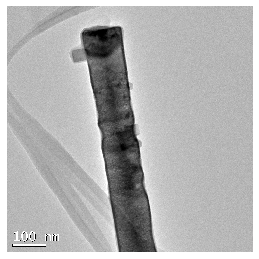

In [24]:
dir_file = file_download('https://drive.google.com/open?id=1cFi0rOqN8bcJ7H5fpfPAGS5Rem7TtiII', 'Hexagonal_18.bmp', 
             '/Users/elenashoushpanova/Desktop/')
show_image(dir_file)

In [25]:
def setimage(google_shareable_link, output_filename, output_directory):
    """
    This function is similar to "show_image", but it loads image from a Google Drive instead of local directory.
    Inputs for the function are: 
    (1) "Shareable link" from Google Drive provided as a string. 
        Example: google_shareable_link = 'https://drive.google.com/open?id=1cFi0rOqN8bcJ7H5fpfPAGS5Rem7TtiII'
        ***To get the link: go to the file in your Google Drive, right click, select "Get Shareable link".
    (2) Output file name including file extension provided as a string. 
        Example: output_filename = 'Hexagonal_18.bmp'
    (3) Output Directory path provided as a string.
        Example: output_directory = '/Users/elenashoushpanova/Desktop/'
    Output is an array of image pixel values, image pixel resolution, as well as the image itself.
    
    Note: this function call for "file_download" and "show_image" functions.
    """
    
    # Call for a "file_download" function: ############ Will need a name change to "crystalmath."
    dir_file = file_download(google_shareable_link, output_filename, output_directory)
    
    # Call for a "show_image" function: ############ Will need a name change to "crystalmath."
    image = show_image(dir_file)
    return image, image.shape

Download 100%.


(Array([[179, 176, 181, ..., 185, 188, 177],
        [178, 177, 180, ..., 183, 182, 171],
        [179, 182, 186, ..., 175, 171, 171],
        ...,
        [181, 184, 176, ..., 180, 175, 181],
        [185, 186, 179, ..., 183, 178, 178],
        [183, 185, 182, ..., 187, 178, 181]], dtype=uint8), (2048, 2048))

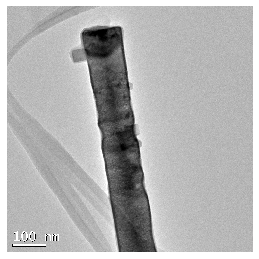

In [26]:
setimage('https://drive.google.com/open?id=1cFi0rOqN8bcJ7H5fpfPAGS5Rem7TtiII', 'Hexagonal_18.bmp', 
             '/Users/elenashoushpanova/Desktop/')

In [27]:
import google_authorization


In [29]:
google_authorization.google_authorization()

/Users/elenashoushpanova/opt/anaconda3/lib/python3.7/site-packages/oauth2client/_helpers.py:255: UserWarning: Cannot access token.json: No such file or directory
  warnings.warn(_MISSING_FILE_MESSAGE.format(filename))



Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?client_id=665821888187-22hhp7vmvvlg1nedd8v6tvugc00t7c7i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.readonly&access_type=offline&response_type=code

Enter verification code: 4/xAFOqd67hEmthQDsI6qGegMynIqN5aDwHYpH0FHpZmCAtzE_BEOBhOc
Authentication successful.
